# 第6章: 機械学習
以降の章では実行時間が長いため全問の変数をそのまま用いている場面があります．

### 50. データの入手・整形
News Aggregator Data Setをダウンロードし、以下の要領で学習データ（train.txt），検証データ（valid.txt），評価データ（test.txt）を作成せよ．

1.ダウンロードしたzipファイルを解凍し，readme.txtの説明を読む．<br>
2.情報源（publisher）が”Reuters”, “Huffington Post”, “Businessweek”, “Contactmusic.com”, “Daily Mail”の事例（記事）のみを抽出する．<br>
3.抽出された事例をランダムに並び替える．<br>
4.抽出された事例の80%を学習データ，残りの10%ずつを検証データと評価データに分割し，それぞれtrain.txt，valid.txt，test.txtというファイル名で保存する．ファイルには，１行に１事例を書き出すこととし，カテゴリ名と記事見出しのタブ区切り形式とせよ（このファイルは後に問題70で再利用する）．<br>
学習データと評価データを作成したら，各カテゴリの事例数を確認せよ．

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

def save_file_1(df, filename):
    df.to_csv(filename, columns = ["CATEGORY","TITLE"], sep="\t", header=False, index=False)

In [2]:
# CSVのロード
news_corpora = pd.read_csv("NewsAggregatorDataset/newsCorpora.csv", 
                            sep="\t", 
                            header=None, 
                            names=["ID","TITLE","URL","PUBLISHER","CATEGORY","STORY","HOSTNAME","TIMESTAMP"]
                            )

# 指定されたPUBLISHERを含む行のみを抜粋
df = news_corpora[(news_corpora["PUBLISHER"] == "Reuters") \
                | (news_corpora["PUBLISHER"] == "Huffington Post") \
                | (news_corpora["PUBLISHER"] == "Businessweek") \
                | (news_corpora["PUBLISHER"] == "Contactmusic.com") \
                | (news_corpora["PUBLISHER"] == "Daily Mail") \
]
# シャッフル
df = df.sample(frac=1)

# 訓練，検証，評価データに分割
train, valid_test = train_test_split(df, test_size=0.2)
valid, test = train_test_split(valid_test, test_size=0.5)

# 保存
save_file_1(train, "train.txt")
save_file_1(valid, "valid.txt")
save_file_1(test, "test.txt")

In [3]:
print(f'train:\n{train["CATEGORY"].value_counts(sort=True)}')
print(f'valid:\n{valid["CATEGORY"].value_counts(sort=True)}')
print(f'test:\n{test["CATEGORY"].value_counts(sort=True)}')

train:
b    4493
e    4197
t    1239
m     743
Name: CATEGORY, dtype: int64
valid:
b    566
e    558
t    127
m     83
Name: CATEGORY, dtype: int64
test:
b    568
e    524
t    158
m     84
Name: CATEGORY, dtype: int64


### 51. 特徴量抽出
学習データ，検証データ，評価データから特徴量を抽出し，それぞれtrain.feature.txt，valid.feature.txt，test.feature.txtというファイル名で保存せよ． なお，カテゴリ分類に有用そうな特徴量は各自で自由に設計せよ．記事の見出しを単語列に変換したものが最低限のベースラインとなるであろう．

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

def save_file_1(df, filename):
    df.to_csv(filename, columns = ["CATEGORY","TITLE"], sep="\t", header=False, index=False)

def save_file_2(df, filename):
    df.to_csv(filename, sep=",", header=False, index=False)

In [6]:
# CSVファイルのロード
news_corpora = pd.read_csv("NewsAggregatorDataset/newsCorpora.csv", sep="\t", header=None)
news_corpora.columns = ["ID", "TITLE", "URL", "PUBLISHER", "CATEGORY", "STORY", "HOSTNAME", "TIMESTAMP"]

# 指定されたPUBLISHERを含む行のみを抜粋
df = news_corpora[(news_corpora["PUBLISHER"] == "Reuters") \
                | (news_corpora["PUBLISHER"] == "Huffington Post") \
                | (news_corpora["PUBLISHER"] == "Businessweek") \
                | (news_corpora["PUBLISHER"] == "Contactmusic.com") \
                | (news_corpora["PUBLISHER"] == "Daily Mail")]
df = df.sample(frac=1)

# 訓練，検証，評価データに分割
train_f, valid_test_f = train_test_split(df, test_size=0.2)
valid_f, test_f = train_test_split(valid_test_f, test_size=0.5)

vec_tfidf = TfidfVectorizer()

# TFIDF値を特徴量として算出
train_X = vec_tfidf.fit_transform(train_f["TITLE"])
valid_X = vec_tfidf.transform(valid_f["TITLE"])
test_X = vec_tfidf.transform(test_f["TITLE"])

# DataFrame型へ変換
train_X = pd.DataFrame(train_X.toarray(), columns=vec_tfidf.get_feature_names_out())
valid_X = pd.DataFrame(valid_X.toarray(), columns=vec_tfidf.get_feature_names_out())
test_X = pd.DataFrame(test_X.toarray(), columns=vec_tfidf.get_feature_names_out())

# 保存
save_file_2(train_X, "train.feature.txt")
save_file_2(valid_X, "valid.feature.txt")
save_file_2(test_X, "test.feature.txt")

train_X.head()

,00,05,08,09,0ff,0ut,10,100,1000,10000,...,zone,zooey,zoosk,zpfa3mqti7qdrpfhqwjm,zuckerberg,zynga,zâ,œlousyâ,œpiece,œwaist
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.307325,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 52. 学習
51で構築した学習データを用いて，ロジスティック回帰モデルを学習せよ．

In [7]:
from sklearn.linear_model import LogisticRegression
import pandas as pd

#学習データの読み込み
train_X = pd.read_csv('train.feature.txt', encoding='utf-8', sep=',', header=None)
train_Y = pd.read_csv('train.txt', sep='\t', encoding='utf-8', names=['CATEGORY', 'TITLE'])

# 学習
LR = LogisticRegression(max_iter=10000)
LR.fit(train_X, train_Y["CATEGORY"])

LogisticRegression(max_iter=10000)

### 53. 予測
52で学習したロジスティック回帰モデルを用い，与えられた記事見出しからカテゴリとその予測確率を計算するプログラムを実装せよ．

52で学習したモデルLRを使用

In [8]:
import numpy as np

#評価データの読み込み
test_X = pd.read_csv('test.feature.txt', encoding='utf-8', sep=',', header=None)
test_Y = pd.read_csv('test.txt', sep='\t', encoding='utf-8', names=['CATEGORY', 'TITLE'])

# 予測確率と予測カテゴリをDataFrame型にして出力
data = [np.max(LR.predict_proba(test_X), axis=1), LR.predict(test_X), test_Y["TITLE"]]
df_test = pd.DataFrame(np.array(data).T, columns=["Accuracy", "CATEGORY", "TITLE"])
df_test.head()

,Accuracy,CATEGORY,TITLE
0,0.577463,e,'Surprised' Microsoft Works With China as Wind...
1,0.360574,b,ECB's Draghi says euro zone recovery proceeding
2,0.466654,b,UPDATE 2-European Factors to Watch-Ukraine wor...
3,0.635243,b,Ousted chairman Charney reports 42.98 pct stak...
4,0.602697,b,Bouygues confirms improved offer for Vivendi's...


### 54. 正解率の計測
52で学習したロジスティック回帰モデルの正解率を，学習データおよび評価データ上で計測せよ．

In [9]:
from sklearn.metrics import accuracy_score

#予測
train_pred = LR.predict(train_X)
test_pred = LR.predict(test_X)

# 学習データと評価データのAccuracyを出力
train_accuracy = accuracy_score(train_Y['CATEGORY'], train_pred)
test_accuracy = accuracy_score(test_Y['CATEGORY'], test_pred)
print("正解率（学習データ）: {0:.3f}".format(train_accuracy))
print("正解率（評価データ）: {0:.3f}".format(test_accuracy))

正解率（学習データ）: 0.695
正解率（評価データ）: 0.420


### 55. 混同行列の作成
52で学習したロジスティック回帰モデルの混同行列（confusion matrix）を，学習データおよび評価データ上で作成せよ．

In [10]:
from sklearn.metrics import confusion_matrix

train_cm = confusion_matrix(train_Y['CATEGORY'], train_pred)
test_cm = confusion_matrix(test_Y['CATEGORY'], test_pred)
print(train_cm)
print(test_cm)

[[3913  580    0    0]
 [ 752 3445    0    0]
 [ 401  336    6    0]
 [ 673  517    0   49]]
[[326 239   0   3]
 [289 234   0   1]
 [ 50  34   0   0]
 [ 91  67   0   0]]


### 56. 適合率，再現率，F1スコアの計測
52で学習したロジスティック回帰モデルの適合率，再現率，F1スコアを，評価データ上で計測せよ．カテゴリごとに適合率，再現率，F1スコアを求め，カテゴリごとの性能をマイクロ平均（micro-average）とマクロ平均（macro-average）で統合せよ．

In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score

# 適合率
precision = precision_score(test_Y['CATEGORY'], test_pred, average=None, labels=['b', 'e', 't', 'm'])
precision = np.append(precision, precision_score(test_Y['CATEGORY'], test_pred, average='micro'))
precision = np.append(precision, precision_score(test_Y['CATEGORY'], test_pred, average='macro'))

# 再現率
recall = recall_score(test_Y['CATEGORY'], test_pred, average=None, labels=['b', 'e', 't', 'm'])
recall = np.append(recall, recall_score(test_Y['CATEGORY'], test_pred, average='micro'))
recall = np.append(recall, recall_score(test_Y['CATEGORY'], test_pred, average='macro'))

# F1スコア
f1 = f1_score(test_Y['CATEGORY'], test_pred, average=None, labels=['b', 'e', 't', 'm'])
f1 = np.append(f1, f1_score(test_Y['CATEGORY'], test_pred, average='micro'))
f1 = np.append(f1, f1_score(test_Y['CATEGORY'], test_pred, average='macro'))

# ２次元配列化
data = [precision, recall, f1]

# 2次元配列を転置してDataFrame型に変換
scores = pd.DataFrame(np.array(data).T, columns=['適合率', '再現率', 'F1スコア'], index=['b', 'e', 't', 'm', 'マイクロ平均', 'マクロ平均'])
scores.head()

D:\base\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\base\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,適合率,再現率,F1スコア
b,0.431217,0.573944,0.492447
e,0.407666,0.446565,0.426230
t,0.000000,0.000000,0.000000
m,0.000000,0.000000,0.000000
マイクロ平均,0.419790,0.419790,0.419790


### 56.適合率，再現率，F1スコアの計測
52で学習したロジスティック回帰モデルの中で，重みの高い特徴量トップ10と，重みの低い特徴量トップ10を確認せよ．

In [12]:
words = np.array(vec_tfidf.get_feature_names_out())
index = [i for i in range(1, 11)]
for class_, coef_ in zip(LR.classes_, LR.coef_): # ラベルとそれに対応する重みを参照
        print(f'CATEGORY : {class_}')
        best = pd.DataFrame(words[np.argsort(coef_)[::-1][:10]], columns=["高い"], index=index).T
        worst = pd.DataFrame(words[np.argsort(coef_)[:10]], columns=["低い"], index=index).T
        print(pd.concat([best, worst], axis=0), end='\n\n')

CATEGORY : b
      1       2        3      4      5      6     7         8         9   \
高い  days  buying  obesity  yield  fraud  signs   don  released    safety   
低い  sign      17    album     if   john  firms  open   arrives  daughter   

        10  
高い  africa  
低い    fine  

CATEGORY : e
         1      2      3      4       5      6      7        8         9   \
高い     plan  makes    pop  looks    five    pay   this    above       did   
低い  changed  share  stars  going  comedy  plane  light  remains  released   

          10  
高い  optimism  
低い     nears  

CATEGORY : m
            1       2            3        4     5        6       7      8   \
高い  treasuries      un  authorities  worries  seen  ukraine  threat  stars   
低い   inflation  higher         what     case  deal    house   falls   over   

        9    10  
高い   ultra  dad  
低い  shares  for  

CATEGORY : t
      1        2      3       4    5      6     7       8             9   \
高い  even  reaches  phone   house  p

### 58. 正則化パラメータの変更
ロジスティック回帰モデルを学習するとき，正則化パラメータを調整することで，学習時の過学習（overfitting）の度合いを制御できる．異なる正則化パラメータでロジスティック回帰モデルを学習し，学習データ，検証データ，および評価データ上の正解率を求めよ．実験の結果は，正則化パラメータを横軸，正解率を縦軸としたグラフにまとめよ．

In [ ]:
from tqdm import tqdm

def score_LR(lg, X):
  return [np.max(lg.predict_proba(X), axis=1), lg.predict(X)]


#検証データの読み込み
valid_X = pd.read_csv('valid.feature.txt', encoding='utf-8', sep=',', header=None)
valid_Y = pd.read_csv('valid.txt', sep='\t', encoding='utf-8', names=['CATEGORY', 'TITLE'])

result = []
for C in tqdm(range(1, 11)):
  C *= 0.1
  # モデルの学習
  LR = LogisticRegression(max_iter=10000, C=C)
  LR.fit(train_X, train_Y['CATEGORY'])

  # 予測値の取得
  train_pred = score_LR(LR, train_X)
  valid_pred = score_LR(LR, valid_X)
  test_pred = score_LR(LR, test_X)

  # 正解率の算出
  train_acc = accuracy_score(train_Y['CATEGORY'], train_pred[1])
  valid_acc = accuracy_score(valid_Y['CATEGORY'], valid_pred[1])
  test_acc = accuracy_score(test_Y['CATEGORY'], test_pred[1])

  # 結果の格納
  result.append([C, train_acc, valid_acc, test_acc])

100%|██████████| 10/10 [02:33<00:00, 15.35s/it]


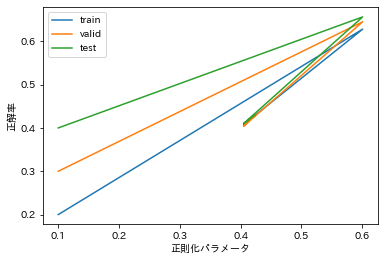

In [ ]:
from matplotlib import pyplot as plt
import japanize_matplotlib

#結果の図示
plt.plot(result[0], result[1], label='train')
plt.plot(result[0], result[2], label='valid')
plt.plot(result[0], result[3], label='test')
plt.xlabel('正則化パラメータ')
plt.ylabel('正解率')
plt.legend()
plt.show()

### 59. ハイパーパラメータの探索
学習アルゴリズムや学習パラメータを変えながら，カテゴリ分類モデルを学習せよ．検証データ上の正解率が最も高くなる学習アルゴリズム・パラメータを求めよ．また，その学習アルゴリズム・パラメータを用いたときの評価データ上の正解率を求めよ．

`K近傍法`での学習

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

#学習データの読み込み
train_X = pd.read_csv('train.feature.txt', encoding='utf-8', sep=',', header=None)
train_Y = pd.read_csv('train.txt', sep='\t', encoding='utf-8', names=['CATEGORY', 'TITLE'])

#検証データの読み込み
valid_X = pd.read_csv('valid.feature.txt', encoding='utf-8', sep=',', header=None)
valid_Y = pd.read_csv('valid.txt', sep='\t', encoding='utf-8', names=['CATEGORY', 'TITLE'])

#評価データの読み込み
test_X = pd.read_csv('test.feature.txt', encoding='utf-8', sep=',', header=None)
test_Y = pd.read_csv('test.txt', sep='\t', encoding='utf-8', names=['CATEGORY', 'TITLE'])

acc_ = 0
for k in range(1, 30):
    Kneighbor = KNeighborsClassifier(n_neighbors=k)
    Kneighbor.fit(train_X, train_Y['CATEGORY'])

    valid_pred = Kneighbor.predict(valid_X)
    acc= accuracy_score(valid_Y['CATEGORY'], valid_pred)
    if acc > acc_:
        acc_ = acc
        print(f'k={k}, valid_acc : {acc}')

k=1, valid_acc : 0.3613193403298351
k=2, valid_acc : 0.3980509745127436
k=3, valid_acc : 0.40554722638680657
k=5, valid_acc : 0.4062968515742129
k=9, valid_acc : 0.41379310344827586
k=11, valid_acc : 0.4197901049475262
k=19, valid_acc : 0.424287856071964
k=28, valid_acc : 0.42653673163418293


`ロジスティック回帰`での学習（パラメータを変えて）

In [20]:
from tqdm import tqdm
import math
import numpy as np

def score_LR(lg, X):
  return [np.max(lg.predict_proba(X), axis=1), lg.predict(X)]

acc_ = 0
for C in range(1, 15):
  C = float(C)*math.pow(math.e, -3)
  # モデルの学習
  LR = LogisticRegression(random_state=123, max_iter=10000, C=C)
  LR.fit(train_X, train_Y['CATEGORY'])

  # 予測値の取得
  valid_pred = score_LR(LR, valid_X)
  test_pred = score_LR(LR, test_X)

  # 正解率の算出
  valid_acc = accuracy_score(valid_Y['CATEGORY'], valid_pred[1])
  test_acc = accuracy_score(test_Y['CATEGORY'], test_pred[1])
  if valid_acc > acc_:
    acc_ = valid_acc
    print(f'C={C}, valid accuracy : {valid_acc}, test accuracy : {test_acc}')

C=0.04978706836786395, valid accuracy : 0.41529235382308843, test accuracy : 0.4257871064467766
C=0.0995741367357279, valid accuracy : 0.4250374812593703, test accuracy : 0.44227886056971516


`ランダムフォレスト`での学習

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

#学習データの読み込み
train_X = pd.read_csv('train.feature.txt', encoding='utf-8', sep=',', header=None)
train_Y = pd.read_csv('train.txt', sep='\t', encoding='utf-8', names=['CATEGORY', 'TITLE'])

#検証データの読み込み
valid_X = pd.read_csv('valid.feature.txt', encoding='utf-8', sep=',', header=None)
valid_Y = pd.read_csv('valid.txt', sep='\t', encoding='utf-8', names=['CATEGORY', 'TITLE'])

#評価データの読み込み
test_X = pd.read_csv('test.feature.txt', encoding='utf-8', sep=',', header=None)
test_Y = pd.read_csv('test.txt', sep='\t', encoding='utf-8', names=['CATEGORY', 'TITLE'])

forest = RandomForestClassifier(random_state=1234)
forest.fit(train_X, train_Y['CATEGORY'])

valid_pred = forest.predict(valid_X)
acc= accuracy_score(valid_Y['CATEGORY'], valid_pred)
print(acc)

0.3853073463268366
